In [8]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# define the path where the data is persisted
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

In [10]:
# load some stock data
ibm_data = pd.read_feather(STORAGE_PATH.format("IBM_original"))

In [11]:
# time axis
time = np.arange(ibm_data.shape[0])

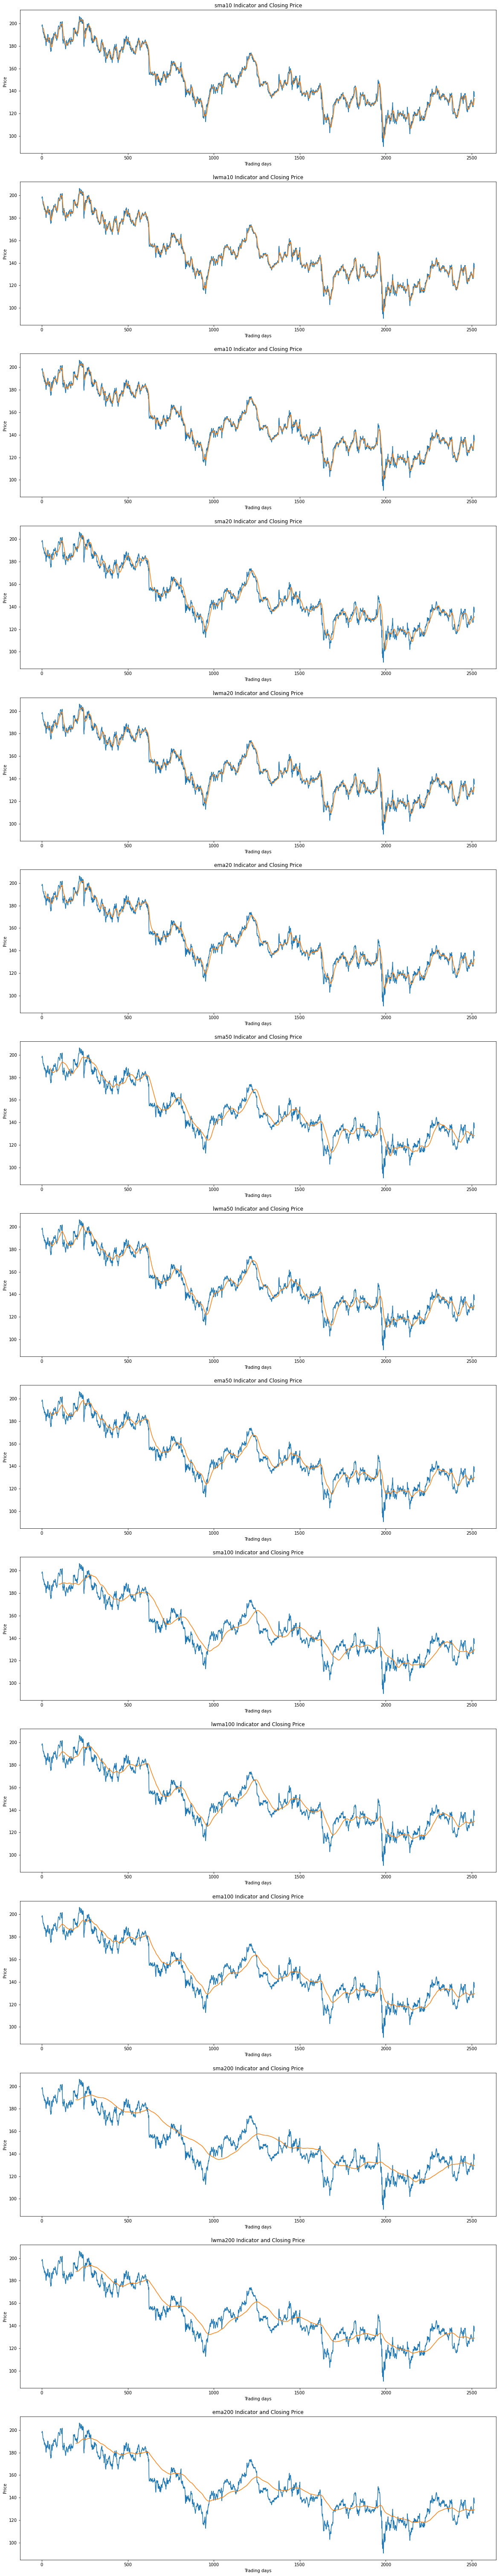

In [5]:
# Plot all the moving average indicators and the closing price
ma_columns = [column for column in ibm_data 
             if column.startswith("sma") 
             or column.startswith("lwma") 
             or column.startswith("ema")
            ]

fig, axs = plt.subplots(len(ma_columns), figsize=(20, 110))
plot_counter = 0

for indicator in ma_columns:
    current_subplot = axs[plot_counter]
    current_subplot.plot(time, ibm_data["current_price"])
    current_subplot.plot(time, ibm_data[indicator])
    current_subplot.title.set_text("{} Indicator and Closing Price".format(indicator))
    current_subplot.set_xlabel("Trading days")
    current_subplot.set_ylabel("Price")
    plot_counter += 1
    
plt.show()

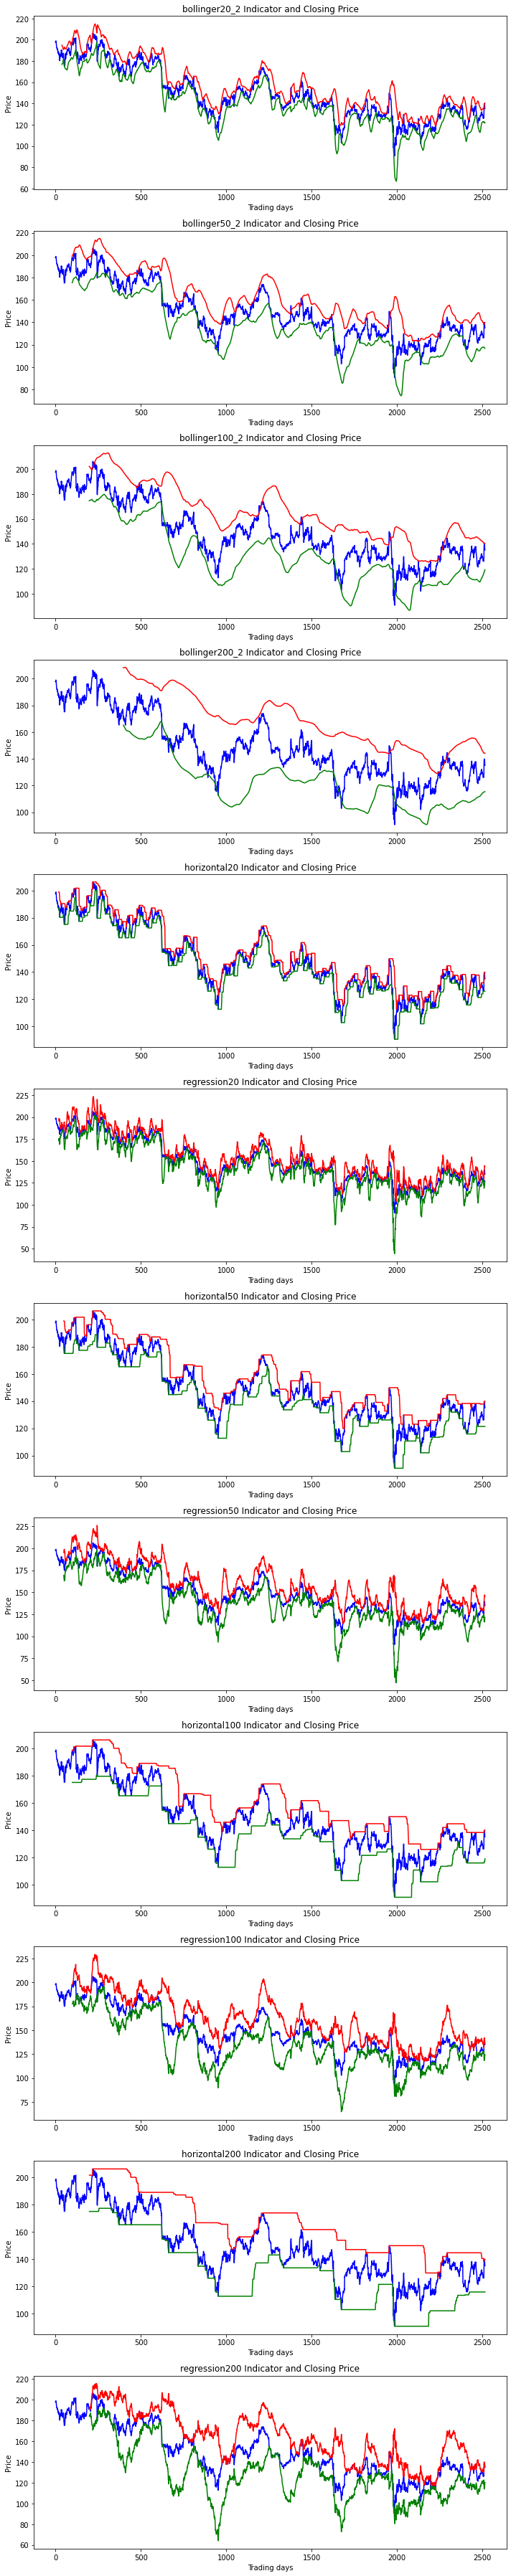

In [13]:
# Plot all the indicators with a channel and the closing price
ma_columns = [column.replace("lower", "{}") for column in ibm_data 
              if "lower" in column
             ]

fig, axs = plt.subplots(len(ma_columns), figsize=(10,50))
plot_counter = 0

for indicator in ma_columns:
    current_subplot = axs[plot_counter]
    current_subplot.plot(time, ibm_data["current_price"], color="blue")
    current_subplot.plot(time, ibm_data[indicator.format("lower")], color="green")
    current_subplot.plot(time, ibm_data[indicator.format("upper")], color="red")
    current_subplot.title.set_text("{} Indicator and Closing Price".format(indicator.replace("_{}", "")))
    current_subplot.set_xlabel("Trading days")
    current_subplot.set_ylabel("Price")
    plot_counter += 1

fig.tight_layout()
plt.show()

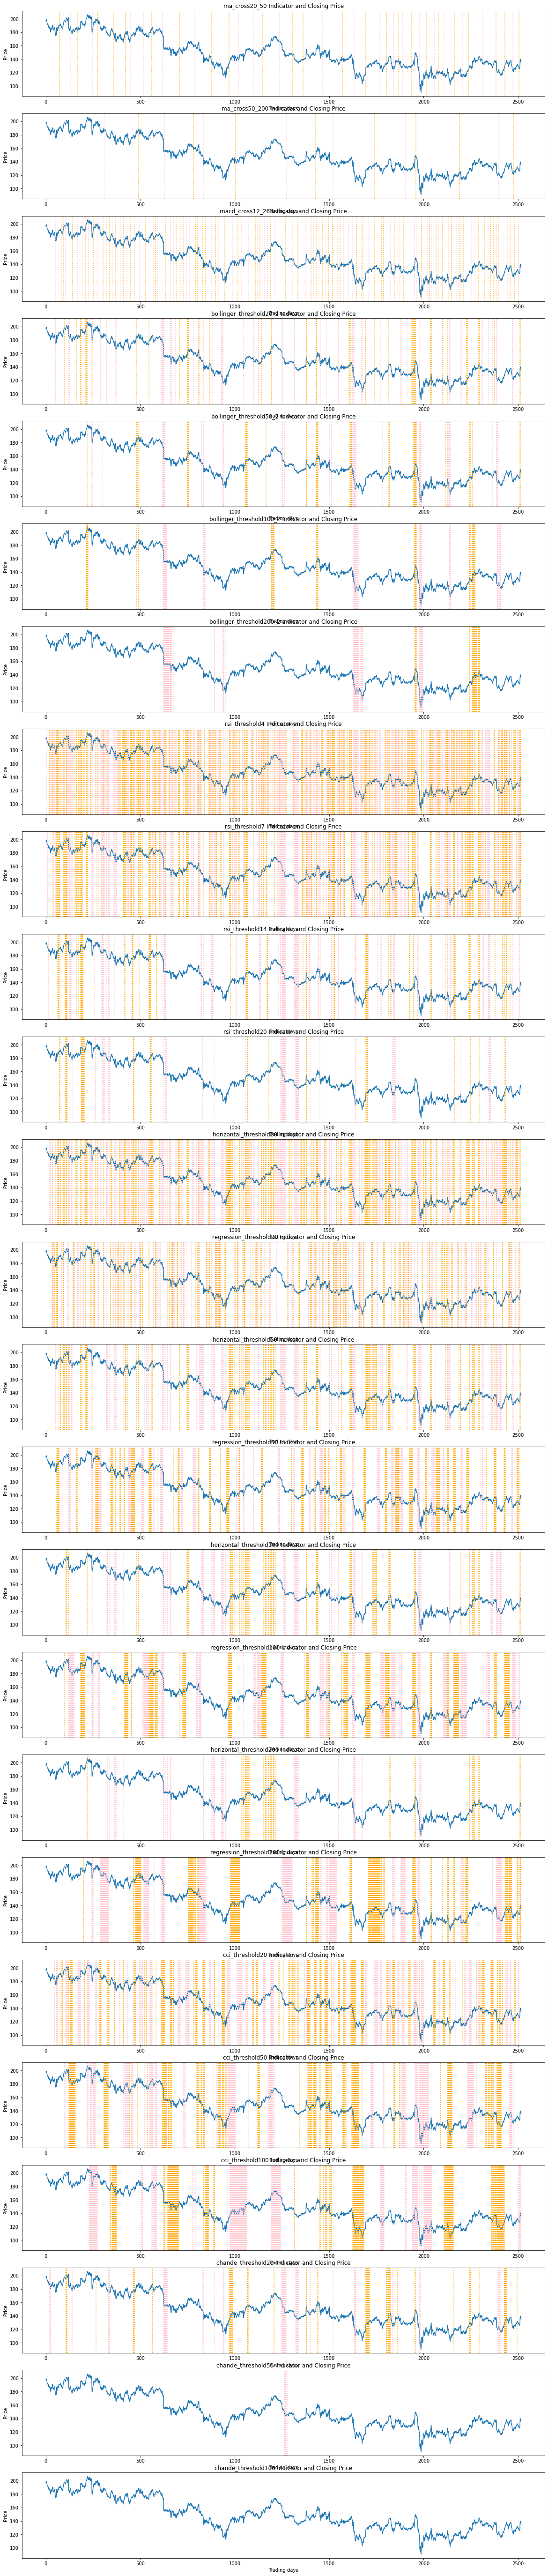

In [12]:
# plot crossings
# Plot all the indicators with a channel and the closing price
ma_columns = [column for column in ibm_data
              if "cross" in column 
              or "threshold" in column
             ]

fig, axs = plt.subplots(len(ma_columns), figsize=(20,100))
plot_counter = 0

for indicator in ma_columns:
    current_subplot = axs[plot_counter]
    current_subplot.plot(time, ibm_data["current_price"])
    for i, row in ibm_data.iterrows():
        if row[indicator] >= 1:
            current_subplot.axvline(x=i, color="orange", ls=":", label="indicator 1 signals")
        if row[indicator] <= -1:
            current_subplot.axvline(x=i, color="pink", ls=":", label="indicator -1 signals")
            
    current_subplot.title.set_text("{} Indicator and Closing Price".format(indicator.replace("_{}", "")))
    current_subplot.set_xlabel("Trading days")
    current_subplot.set_ylabel("Price")
    plot_counter += 1
    
plt.show()


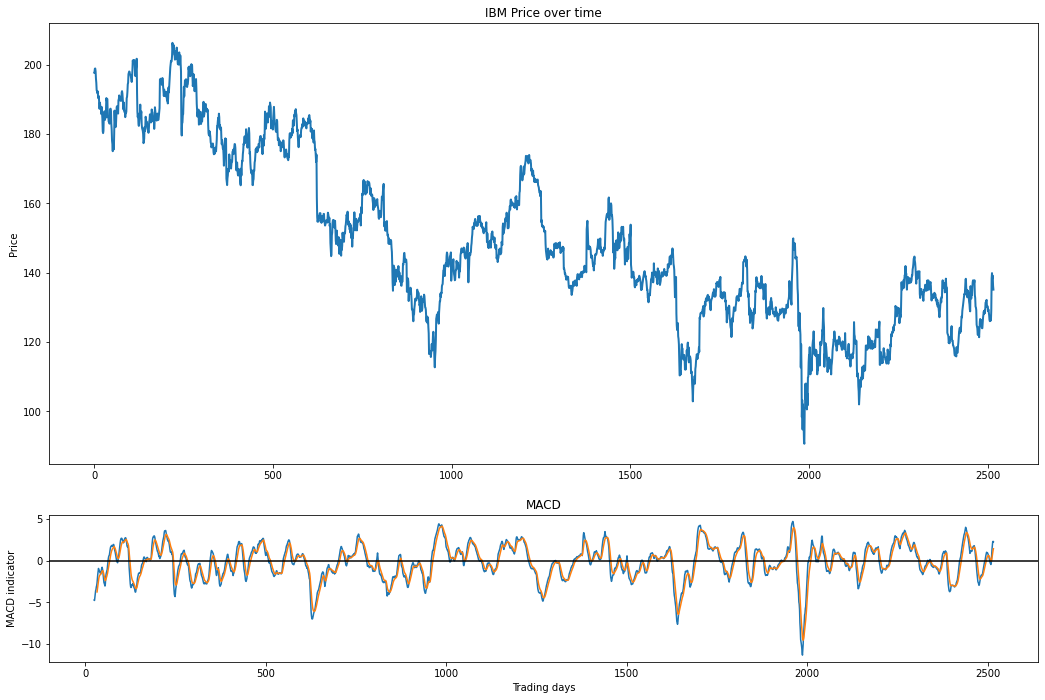

In [53]:
# https://medium.com/analytics-vidhya/visualizing-historical-stock-price-and-volume-from-scratch-46029b2c5ef9
plt.rc("figure", figsize=(15, 10))
    
fig, axes = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
fig.tight_layout(pad=3)

axes[0].plot(time, ibm_data["current_price"], linewidth=2, label="Price")
axes[0].title.set_text("IBM Price over time")
axes[0].set_ylabel("Price")
axes[1].plot(time, ibm_data["macd12_26"], label="ema12 - ema26")
axes[1].plot(time, ibm_data["macd_signal12_26"], label="smoothed ema12 - ema26")
axes[1].axhline(y=0, color="black", linestyle='-')
axes[1].title.set_text("MACD")
axes[1].set_xlabel("Trading days")
axes[1].set_ylabel("MACD indicator")
plt.show()

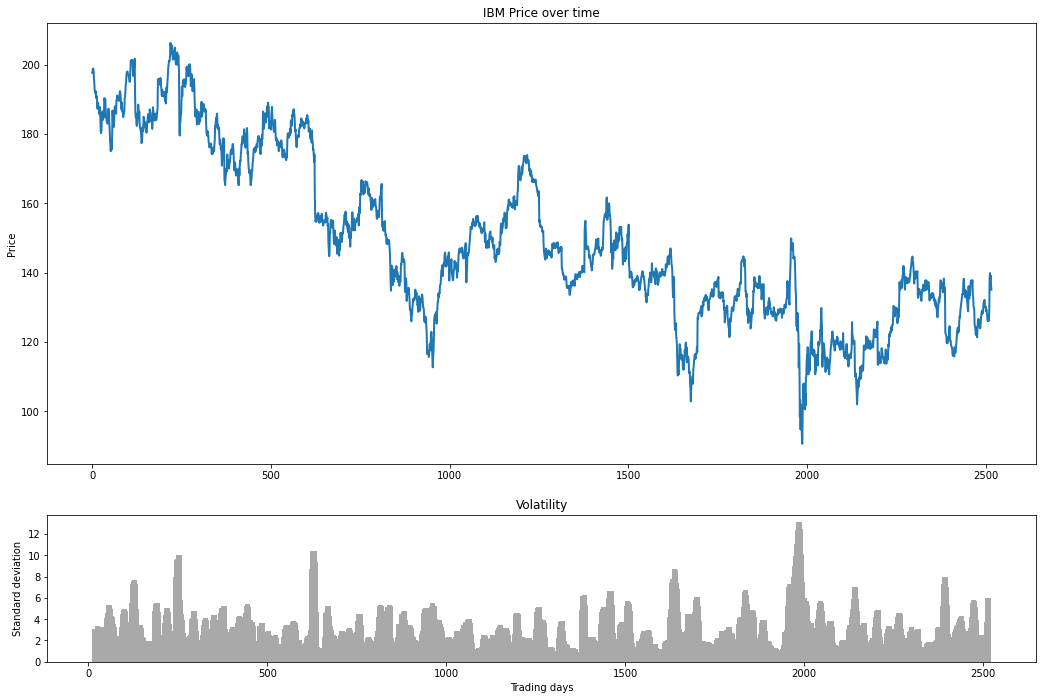

In [54]:
# https://medium.com/analytics-vidhya/visualizing-historical-stock-price-and-volume-from-scratch-46029b2c5ef9
plt.rc("figure", figsize=(15, 10))
    
fig, axes = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
fig.tight_layout(pad=3)

axes[0].plot(time, ibm_data["current_price"], linewidth=2, label="Price")
axes[0].title.set_text("IBM Price over time")
axes[0].set_ylabel("Price")
axes[1].bar(time, ibm_data["volatility10"], width=15, color="darkgrey")
axes[1].title.set_text("Volatility")
axes[1].set_xlabel("Trading days")
axes[1].set_ylabel("Standard deviation")
plt.show()

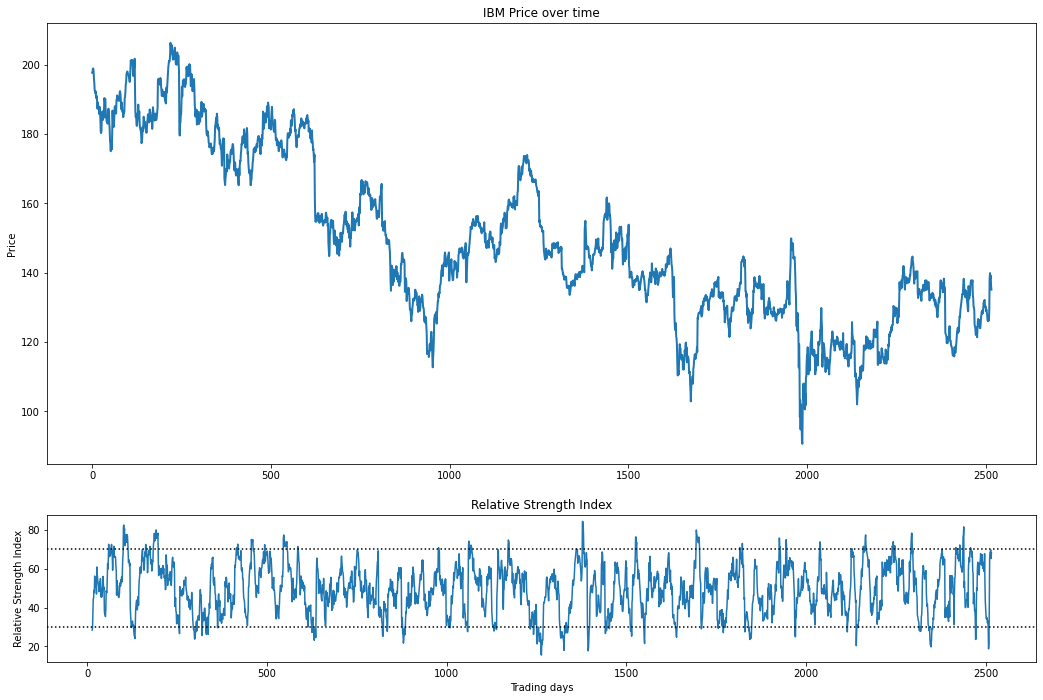

In [56]:
# https://medium.com/analytics-vidhya/visualizing-historical-stock-price-and-volume-from-scratch-46029b2c5ef9
plt.rc("figure", figsize=(15, 10))
    
fig, axes = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
fig.tight_layout(pad=3)

axes[0].plot(time, ibm_data["current_price"], linewidth=2, label="Price")
axes[0].title.set_text("IBM Price over time")
axes[0].set_ylabel("Price")
axes[1].plot(time, ibm_data["rsi14"], label="Relative Strength Index")
axes[1].title.set_text("Relative Strength Index")
axes[1].axhline(y=70, color="black", linestyle=':')
axes[1].axhline(y=30, color="black", linestyle=':')
axes[1].set_xlabel("Trading days")
axes[1].set_ylabel("Relative Strength Index")
plt.show()

Text(0, 0.5, 'Price')

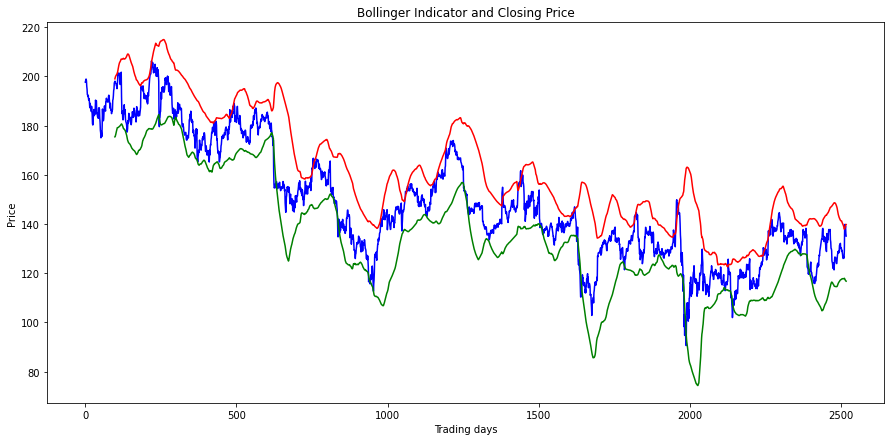

In [66]:
plt.rc("figure", figsize=(15, 7))
plt.plot(time, ibm_data["current_price"], color="blue")
plt.plot(time, ibm_data["bollinger_lower50_2"], color="green")
plt.plot(time, ibm_data["bollinger_upper50_2"], color="red")
plt.title("Bollinger Indicator and Closing Price")
plt.xlabel("Trading days")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

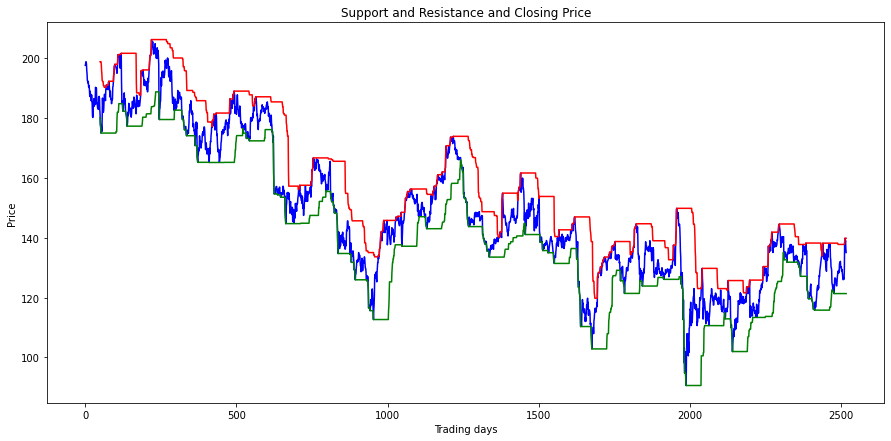

In [65]:
plt.rc("figure", figsize=(15, 7))
plt.plot(time, ibm_data["current_price"], color="blue")
plt.plot(time, ibm_data["horizontal_lower50"], color="green")
plt.plot(time, ibm_data["horizontal_upper50"], color="red")
plt.title("Support and Resistance and Closing Price")
plt.xlabel("Trading days")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

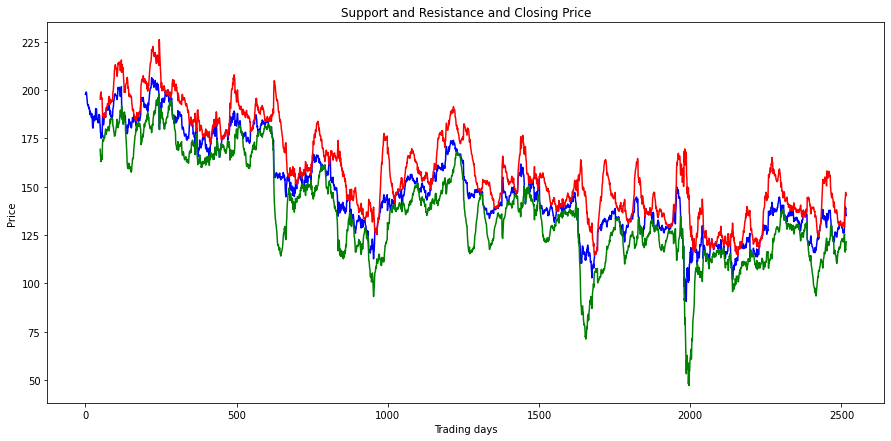

In [67]:
plt.rc("figure", figsize=(15, 7))
plt.plot(time, ibm_data["current_price"], color="blue")
plt.plot(time, ibm_data["regression_lower50"], color="green")
plt.plot(time, ibm_data["regression_upper50"], color="red")
plt.title("Support and Resistance and Closing Price")
plt.xlabel("Trading days")
plt.ylabel("Price")